In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import math

In [67]:
images=[]
path = "/home/arjun/Desktop/gmm/ENPM673-P3-Color-segmentation-using-Gaussian-Mixture-Models-and-Expectation-Maximization/Data/Green/"
for image in os.listdir(path):
    images.append(image)

In [68]:
hitogram_b=np.zeros((256,1))
hitogram_g=np.zeros((256,1))
hitogram_r=np.zeros((256,1))

In [69]:
im=cv2.imread("%s%s"%(path,images[0]))

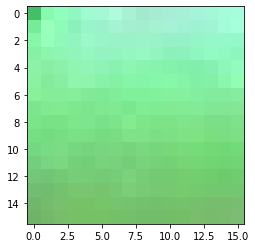

In [70]:
plt.imshow(im)

In [71]:
for image in images:
    img = cv2.imread("%s%s"%(path,image))
    color = ("b", "g", "r") 
    for i,col in enumerate(color):
        if col =='b':
            histr_b = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_b=np.column_stack((hitogram_b,histr_b))

        if col =='g':
            histr_g = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_g=np.column_stack((hitogram_g,histr_g))

        if col =='r':
            histr_r = cv2.calcHist([img],[i],None,[256],[0,256])
            hitogram_r=np.column_stack((hitogram_r,histr_r))


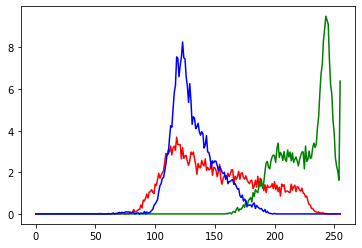

In [72]:
histogram_avg_r = np.sum(hitogram_r, axis=1) / (hitogram_r.shape[1]-1)
histogram_avg_g = np.sum(hitogram_g, axis=1) / (hitogram_g.shape[1]-1)
histogram_avg_b = np.sum(hitogram_b, axis=1) / (hitogram_b.shape[1]-1)

plt.plot(histogram_avg_r,color = 'r')
plt.plot(histogram_avg_g,color = 'g')
plt.plot(histogram_avg_b,color = 'b')
plt.show()


In [73]:
def Probabilty(x_co, mean, std):
    m=mean*np.ones((1,x_co.shape[0]))
    return (1 / (std * np.sqrt(2 * np.pi))) * (np.exp(-(np.square(x_co - m)) / (2 * (std) ** 2)))

## GREEN CHANNEL

In [74]:
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 1]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

n = 0
mean1 = 120
mean2 = 150
mean3 = 250

std1 = 10
std2 = 10
std3 = 10
   

In [75]:
while (n != 60):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
        p3 = Probabilty(p, mean3, std3)
        
        D=p1+ p2 +p3
#         D=p1+ p2 
        b1=p1/D
        b2=p2/D
        b3=p3/D
        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
        mean3=np.sum(b3*p)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
        std3=np.sqrt(np.sum(b3*np.square(p-mean3))/np.sum(b3))
        n = n + 1

In [76]:
print('final mean- ',mean1,mean2,mean3)
print('final strd- ',std1, std2, std3)

final mean-  200.99041095431753 230.93168264238778 244.43035756058714
final strd-  12.952336602432144 11.823406251139293 5.067392724680564


## RED CHANNEL

In [77]:
n = 0
mean1 = 120
mean2 = 150
mean3 = 190

std1 = 10
std2 = 10
std3 = 10
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 2]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

In [78]:
while (n != 60):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
        p3 = Probabilty(p, mean3, std3)
        
        D=p1+ p2 +p3
#         D=p1+ p2 
        b1=p1/D
        b2=p2/D
        b3=p3/D
        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
        mean3=np.sum(b3*p)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
        std3=np.sqrt(np.sum(b3*np.square(p-mean3))/np.sum(b3))
        n = n + 1

In [79]:
print('final mean- ',mean1,mean2,mean3)
print('final strd- ',std1, std2, std3)

final mean-  114.82233975900914 146.11481088492448 194.35276885235794
final strd-  13.028929984903527 17.78744158562793 21.072163780961105


## BLUE CHANNEL

In [80]:
n = 0
mean1 = 120
mean2 = 200
mean3 = 150

std1 = 10
std2 = 10
std3 = 10
pixel=[]
for image in images:
        image = cv2.imread("%s%s"%(path,image))
        image = image[:, :, 0]
        for i in np.ravel(image):
            pixel.append(i)

p=np.array(pixel)

In [81]:
while (n != 100):
        p1 = Probabilty(p,mean1,std1)
        p2 = Probabilty(p, mean2, std2)
        p3 = Probabilty(p, mean3, std3)
        
        D=p1+ p2 +p3
#         D=p1+ p2 
        b1=p1/D
        b2=p2/D
        b3=p3/D
        
        mean1=np.sum(b1*p)/(np.sum(b1))
        mean2=np.sum(b2*p)/(np.sum(b2))
        mean3=np.sum(b3*p)/(np.sum(b3))
        
        std1=np.sqrt(np.sum(b1*np.square(p-mean1))/np.sum(b1))
        std2=np.sqrt(np.sum(b2*np.square(p-mean2))/np.sum(b2))
        std3=np.sqrt(np.sum(b3*np.square(p-mean3))/np.sum(b3))
        n = n + 1

In [82]:
print('final mean- ',mean1,mean2,mean3)
print('final strd- ',std1, std2, std3)

final mean-  129.27217615666626 147.40110125053346 120.98191928424569
final strd-  16.948941041403064 18.96752079258606 6.978926892053024


## GAUSSIAN PLOT

0.02354732055094594
0.057236820376122044
0.02103657745748104
0.03375068892169574
0.03080631695968449
0.07857121684024371
0.030637465786577764
0.022449813401448252
0.018940512384825445


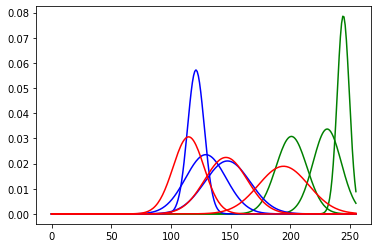

In [90]:
def gaussian(x, mu, sig):
    return ((1/(sig*math.sqrt(2*math.pi)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))


x=list(range(0, 256))


mg1=np.array([230.92])
sg1=np.array([11.82])
mg2=np.array([200.98])
sg2=np.array([12.95])
mg3=np.array([244.42])
sg3=np.array([5.06])

g1=gaussian(x, mg1, sg1)
g2=gaussian(x, mg2, sg2)
g3=gaussian(x, mg3, sg3)

plt.plot(g1, 'g')
plt.plot(g2, 'g')
plt.plot(g3, 'g')



mr1=np.array([114.81])
sr1=np.array([13.02])
mr2=np.array([146.12])
sr2=np.array([17.77])
mr3=np.array([194.35])
sr3=np.array([21.06])

r1=gaussian(x, mr1, sr1)
r2=gaussian(x, mr2, sr2)
r3=gaussian(x, mr3, sr3)

mb1=np.array([129.27])
sb1=np.array([16.94])
mb2=np.array([120.98])
sb2=np.array([6.97])
mb3=np.array([147.40])
sb3=np.array([18.96])

b1=gaussian(x, mb1, sb1)
b2=gaussian(x, mb2, sb2)
b3=gaussian(x, mb3, sb3)

plt.plot(b1, 'b')
plt.plot(b2, 'b')
plt.plot(b3, 'b')
print(max(b1))
print(max(b2))
print(max(b3))

print(max(g1))
print(max(g2))
print(max(g3))

print(max(r1))
print(max(r2))
print(max(r3))

plt.plot(r1, 'r')
plt.plot(r2, 'r')
plt.plot(r3, 'r')
plt.show()


## TRIAL IMAGE SEGMENTATION

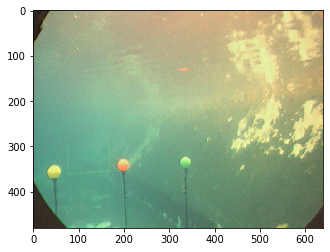

In [99]:
image=cv2.imread('frame.png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


In [106]:
image_g=image[:,:,1]
image_r=image[:,:,2]
img_out3=np.zeros(image_g.shape, dtype = np.uint8)

for index, v in np.ndenumerate(image_g):
    
    if g3[v]>0.06 and g1[v]<0.02 and g2[v]<0.02  and image_r[index]<200:
                            img_out3[index]=255
    else:
                            img_out3[index]=0  
    


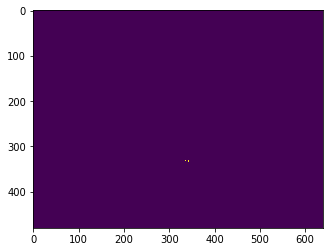

In [107]:
plt.imshow(img_out3)

In [108]:
ret, threshold3 = cv2.threshold(img_out3, 240, 255, cv2.THRESH_BINARY)
kernel3 = np.ones((2,2),np.uint8)
    
dilation3 = cv2.dilate(threshold3,kernel3,iterations =9)
contours3, _= cv2.findContours(dilation3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
for contour in contours3:
            if cv2.contourArea(contour) >  40:
                (x,y),radius = cv2.minEnclosingCircle(contour)
                print(x)
                print(y)
                print(radius)
                center = (int(x),int(y))
                radius = int(radius)
                if radius > 13 and radius < 15.5:
                    cv2.circle(image,center,radius,(0,0,255),2)

341.5
337.5
14.57748031616211


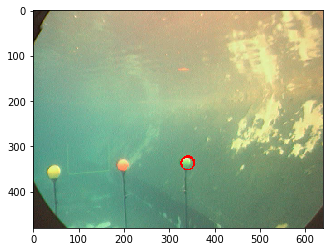

In [109]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))